## You have been hired by a rookie movie producer to help him decide what type of movies to produce and which actors to cast. You have to back your recommendations based on thorough analysis of the data he shared with you which has the list of 3000 movies and the corresponding details.

## As a data scientist, you have to first explore the data and check its sanity.

## Further, you have to answer the following questions:
1. ### <b> Which movie made the highest profit? Who were its producer and director? Identify the actors in that film.</b>
2. ### <b>This data has information about movies made in different languages. Which language has the highest average ROI (return on investment)? </b>
3. ### <b> Find out the unique genres of movies in this dataset.</b>
4. ### <b> Make a table of all the producers and directors of each movie? </b>
5. ### <b> Which actor has acted in the most number of movies? 



In [1]:
# let's import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("imdb_data.csv")

In [3]:
df[:1]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651


In [4]:
df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [6]:
type(df.iloc[0]["belongs_to_collection"])

str

In [7]:
# let's convert these columns str to list 
type(eval(df.iloc[0]["belongs_to_collection"]))

list

In [8]:
# let's create a function for that
def str_to_list(col):
    return eval(col)

In [9]:
## df["belongs_to_collection"] = df.apply(lambda x: str_to_list(x["belongs_to_collection"]))

## it will through an error because of null values 

## let's try another method for ignore the null values

df.loc[~df["belongs_to_collection"].isna(),"belongs_to_collection"] = df.loc[~df["belongs_to_collection"].isna(),"belongs_to_collection"].apply(str_to_list)

In [10]:
# now we can see we succesfuly convert a str to list
type(df.iloc[0]["belongs_to_collection"])

list

In [11]:
# now lets apply this for other columns
df.loc[~df["genres"].isna(),"genres"] = df.loc[~df["genres"].isna(),"genres"].apply(str_to_list)
df.loc[~df["cast"].isna(),"cast"] = df.loc[~df["cast"].isna(),"cast"].apply(str_to_list)
df.loc[~df["crew"].isna(),"crew"] = df.loc[~df["crew"].isna(),"crew"].apply(str_to_list)

In [12]:
type(df.iloc[0]["crew"])
type(df.iloc[0]["cast"])

list

In [13]:
# let's take neceesary columns 
df = df[["imdb_id","title","original_language","genres","popularity","runtime","cast","crew","budget","revenue"]]

In [14]:
df[:1]

,imdb_id,title,original_language,genres,popularity,runtime,cast,crew,budget,revenue
0,tt2637294,Hot Tub Time Machine 2,en,"[{'id': 35, 'name': 'Comedy'}]",6.575393,93.0,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",14000000,12314651


## Q1. Which movie made the highest profit? Who were its producer and director? Identify the actors in that film.

In [15]:
df.describe()

,popularity,runtime,budget,revenue
count,3000.000000,2998.000000,3.000000e+03,3.000000e+03
mean,8.463274,107.856571,2.253133e+07,6.672585e+07
std,12.104000,22.086434,3.702609e+07,1.375323e+08
min,0.000001,0.000000,0.000000e+00,1.000000e+00
25%,4.018053,94.000000,0.000000e+00,2.379808e+06
50%,7.374861,104.000000,8.000000e+06,1.680707e+07
75%,10.890983,118.000000,2.900000e+07,6.891920e+07
max,294.337037,338.000000,3.800000e+08,1.519558e+09


In [16]:
#Replace extremely low values of budget and revenue column with median values of budget, revenue
df.loc[df['budget']<1000,'budget']= df['budget'].median()
df.loc[df['revenue']<1000,'revenue']= df['revenue'].median()

In [17]:
# now create a new column to store profit value of every movie
df["profit"] = df["revenue"] - df["budget"]

In [18]:
df['roi']= 100* (df['profit']/df['budget'])

In [19]:
df.head(2)

,imdb_id,title,original_language,genres,popularity,runtime,cast,crew,budget,revenue,profit,roi
0,tt2637294,Hot Tub Time Machine 2,en,"[{'id': 35, 'name': 'Comedy'}]",6.575393,93.0,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",14000000,12314651,-1685349,-12.038207
1,tt0368933,The Princess Diaries 2: Royal Engagement,en,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",8.248895,113.0,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",40000000,95149435,55149435,137.873588


In [20]:
# let's check which movie make max profit
max_profit_movie = df[df["profit"]==df["profit"].max()]

In [21]:
max_profit_movie

,imdb_id,title,original_language,genres,popularity,runtime,cast,crew,budget,revenue,profit,roi
1761,tt2820852,Furious 7,en,"[{'id': 28, 'name': 'Action'}]",27.275687,137.0,"[{'cast_id': 17, 'character': 'Dominic Toretto...","[{'credit_id': '52fe4cc8c3a36847f823e681', 'de...",190000000,1506249360,1316249360,692.762821


In [22]:
# Which movie made the highest profit?
print(f"The highest profit made by movie:",max_profit_movie.iloc[0]['title'])

The highest profit made by movie: Furious 7


In [23]:
# another way to doing this using idxmax which will return the index of highest profit movie

df.iloc[df.profit.idxmax()]["title"]
print(f"The highest profit made by movie:",df.iloc[df.profit.idxmax()]["title"])

The highest profit made by movie: Furious 7


In [24]:
# Who were its producer and director?
crew_list = df.iloc[df.profit.idxmax()]["crew"]
crew_list

[{'credit_id': '52fe4cc8c3a36847f823e681',
  'department': 'Production',
  'gender': 2,
  'id': 12835,
  'job': 'Producer',
  'name': 'Vin Diesel',
  'profile_path': '/7rwSXluNWZAluYMOEWBxkPmckES.jpg'},
 {'credit_id': '52fe4cc8c3a36847f823e687',
  'department': 'Production',
  'gender': 2,
  'id': 11874,
  'job': 'Producer',
  'name': 'Neal H. Moritz',
  'profile_path': '/cNcsEYmoS4niCz3UkVAA09dUIob.jpg'},
 {'credit_id': '52fe4cc8c3a36847f823e68d',
  'department': 'Writing',
  'gender': 2,
  'id': 58191,
  'job': 'Writer',
  'name': 'Chris Morgan',
  'profile_path': '/dUGxIwFBLrSFLImxjeda1krndMO.jpg'},
 {'credit_id': '52fe4cc8c3a36847f823e693',
  'department': 'Writing',
  'gender': 0,
  'id': 8162,
  'job': 'Characters',
  'name': 'Gary Scott Thompson',
  'profile_path': '/e2dMfqFvRsOXgWZ1VToYLmos17y.jpg'},
 {'credit_id': '52fe4cc8c3a36847f823e699',
  'department': 'Directing',
  'gender': 2,
  'id': 2127,
  'job': 'Director',
  'name': 'James Wan',
  'profile_path': '/d1LSKfzi5J6QngW

In [25]:
director=[]
producer=[]
for elem in crew_list:
    if elem["job"] == "Producer":
        producer.append(elem["name"])
    if elem["job"] == "Director":
        director.append(elem["name"])

In [26]:
print(f"The director of movie is:", director)

The director of movie is: ['James Wan']


In [27]:
print(f"The Producers of this movie are:",producer)

The Producers of this movie are: ['Vin Diesel', 'Neal H. Moritz', 'Michael Fottrell', 'Brandon Birtell']


In [28]:
# Identify the actors in that film.
df.iloc[df.profit.idxmax()]["cast"]

[{'cast_id': 17,
  'character': 'Dominic Toretto',
  'credit_id': '5431dfd10e0a265915002c34',
  'gender': 2,
  'id': 12835,
  'name': 'Vin Diesel',
  'order': 0,
  'profile_path': '/7rwSXluNWZAluYMOEWBxkPmckES.jpg'},
 {'cast_id': 19,
  'character': "Brian O'Conner",
  'credit_id': '5431dfe4c3a3681143002b98',
  'gender': 2,
  'id': 8167,
  'name': 'Paul Walker',
  'order': 1,
  'profile_path': '/iqvYezRoEY5k8wnlfHriHQfl5dX.jpg'},
 {'cast_id': 18,
  'character': 'Hobbs',
  'credit_id': '5431dfdbc3a36831a6004376',
  'gender': 2,
  'id': 18918,
  'name': 'Dwayne Johnson',
  'order': 2,
  'profile_path': '/kuqFzlYMc2IrsOyPznMd1FroeGq.jpg'},
 {'cast_id': 20,
  'character': 'Letty',
  'credit_id': '5431dfeec3a36811ef002c75',
  'gender': 1,
  'id': 17647,
  'name': 'Michelle Rodriguez',
  'order': 3,
  'profile_path': '/v37VK0MNuRuJOCKPKJcZAJXRA5r.jpg'},
 {'cast_id': 28,
  'character': 'Roman',
  'credit_id': '5431e0310e0a2656e2002c95',
  'gender': 2,
  'id': 8169,
  'name': 'Tyrese Gibson',
 

In [29]:
actors = []
for elem in df.iloc[df.profit.idxmax()]["cast"]:
    actors.append(elem["name"])

In [30]:
print(f"The actors are:",actors)

The actors are: ['Vin Diesel', 'Paul Walker', 'Dwayne Johnson', 'Michelle Rodriguez', 'Tyrese Gibson', 'Ludacris', 'Jordana Brewster', 'Djimon Hounsou', 'Tony Jaa', 'Ronda Rousey', 'Nathalie Emmanuel', 'Kurt Russell', 'Jason Statham', 'Sung Kang', 'Gal Gadot', 'Lucas Black', 'Elsa Pataky', 'Noel Gugliemi', 'John Brotherton', 'Luke Evans', 'Ali Fazal', 'Miller Kimsey', 'Charlie Kimsey', 'Eden Estrella', 'Gentry White', 'Iggy Azalea', 'Jon Lee Brody', 'Levy Tran', 'Anna Colwell', 'Viktor Hernandez', 'Steve Coulter', 'Robert Pralgo', 'Antwan Mills', 'J.J. Phillips', 'Jorge Ferragut', 'Sara Sohn', 'Benjamin Blankenship', 'D.J. Hapa', 'T-Pain', 'Brian Mahoney', 'Brittney Alger', 'Romeo Santos', 'Jocelin Donahue', 'Stephanie Langston', 'Jorge-Luis Pallo', 'Tego Calder√≥n', 'Nathalie Kelley', 'Shad Moss', 'Don Omar', 'Klement Tinaj', 'Caleb Walker', 'Cody Walker']


## 2. This data has information about movies made in different languages. Which language has the highest average ROI (return on investment)?

In [31]:
df.groupby("original_language")["roi"].mean().reset_index().sort_values(by="roi",ascending=False)[:5]

,original_language,roi
18,ko,11309.685605
6,el,5198.013245
28,sr,3261.413600
7,en,952.119148
32,tr,878.917604


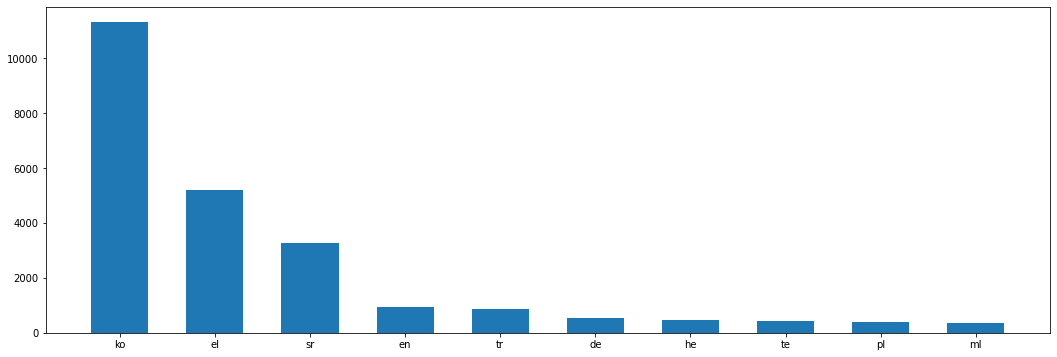

In [32]:
plt.rcParams['figure.figsize'] = (18,6)
x = df.groupby("original_language")["roi"].mean().reset_index().sort_values(by="roi",ascending=False)[:10].original_language
y = df.groupby("original_language")["roi"].mean().reset_index().sort_values(by="roi",ascending=False)[:10].roi
plt.bar(x,y,width=0.6)
plt.show()

In [33]:
print(f"The language with Highest Avg ROI:",df.groupby("original_language")["roi"].mean().reset_index().sort_values(by="roi",ascending=False)[:5].iloc[0][0])

The language with Highest Avg ROI: ko


## 3. Find out the unique genres of movies in this dataset.

In [34]:
df.isna().sum()

imdb_id               0
title                 0
original_language     0
genres                7
popularity            0
runtime               2
cast                 13
crew                 16
budget                0
revenue               0
profit                0
roi                   0
dtype: int64

In [35]:
# let's remove this 7 null genres
no_null_genres = df[~df["genres"].isna()]

In [36]:
no_null_genres.isnull().sum()

imdb_id               0
title                 0
original_language     0
genres                0
popularity            0
runtime               2
cast                 13
crew                 15
budget                0
revenue               0
profit                0
roi                   0
dtype: int64

In [37]:
no_null_genres.iloc[0]["genres"]

[{'id': 35, 'name': 'Comedy'}]

In [38]:
#create a list of genres and using .iterrow() method to iterate over genres column 
# .iterrow() --->> same as enumerate() its compulsory to use it in case of DataFrame
genres_list = []
for index,elem in no_null_genres.iterrows():
    g = no_null_genres.loc[index,"genres"]
    for i in g:
        genres_list.append(i["name"])

In [39]:
print(f"the unique genres of movies in this dataset are:",set(genres_list))

the unique genres of movies in this dataset are: {'Action', 'Comedy', 'Music', 'Mystery', 'Family', 'Horror', 'Crime', 'Drama', 'Fantasy', 'Adventure', 'Foreign', 'Romance', 'War', 'History', 'Science Fiction', 'Western', 'Documentary', 'Animation', 'Thriller', 'TV Movie'}


In [40]:
pd.DataFrame(set(genres_list),columns=["Unique genres"])

,Unique genres
0,Action
1,Comedy
2,Music
3,Mystery
4,Family
5,Horror
6,Crime
7,Drama
8,Fantasy
9,Adventure


## 4. Make a table of all the producers and directors of each movie ? 

In [41]:
no_null_crew = df[~df["crew"].isna()]

In [42]:
no_null_crew.shape

(2984, 12)

In [43]:
## first of all we have to know how to get diretor name from crew column
no_null_crew.iloc[0]["crew"][0]["name"]

'Kelly Cantley'

In [44]:
def get_director_name(index):
    for elem in no_null_crew.loc[index,"crew"]:
        if elem["job"] == "Director":
            return elem["name"]

In [45]:
get_director_name(50)

'Christophe Van Rompaey'

In [46]:
def get_producer_name(index):
    producer = []
    for elem in no_null_crew.loc[index,"crew"]:
        if elem["job"] == "Producer":
            producer.append(elem["name"])
    return producer

In [47]:
get_producer_name(20)

['Carla Fry', 'Akiva Goldsman', 'Stephen Hopkins', 'Mark W. Koch']

In [48]:
# lets create a data feame
producer_director_table = pd.DataFrame(columns=["Movie Name","Producer Name", "Director Name","ROI"])

In [49]:
producer_director_table

,Movie Name,Producer Name,Director Name,ROI


In [50]:
no_null_crew[:1]

,imdb_id,title,original_language,genres,popularity,runtime,cast,crew,budget,revenue,profit,roi
0,tt2637294,Hot Tub Time Machine 2,en,"[{'id': 35, 'name': 'Comedy'}]",6.575393,93.0,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",14000000,12314651,-1685349,-12.038207


In [51]:
for index,elem in no_null_crew.iterrows():
    try:
        producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
    except:
        continue 

C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecat

C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecat

C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecat

C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecat

C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecat

C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecat

C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecat

C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecat

C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecat

C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecat

C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecat

C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecat

C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecat

C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecat

C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecat

C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecat

C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecat

C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecat

C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecat

C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecat

C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecat

C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecat

C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecat

C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\2827314291.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  producer_director_table = producer_director_table.append({"Movie Name":no_null_crew.loc[index,"title"],"Producer Name":get_producer_name(index),"Director Name":get_director_name(index),"ROI":no_null_crew.loc[index,"roi"]},ignore_index=True)


In [52]:
producer_director_table

,Movie Name,Producer Name,Director Name,ROI
0,Hot Tub Time Machine 2,[Andrew Panay],Steve Pink,-12.038207
1,The Princess Diaries 2: Royal Engagement,"[Whitney Houston, Mario Iscovich, Debra Martin...",Garry Marshall,137.873588
2,Whiplash,"[David Lancaster, Michel Litvak, Jason Blum, H...",Damien Chazelle,296.727273
3,Kahaani,[Sujoy Ghosh],Sujoy Ghosh,1233.333333
4,Marine Boy,[],Jong-seok Yoon,-50.950375
...,...,...,...,...
2979,Chasers,[James G. Robinson],Dennis Hopper,-80.041412
2980,We Are the Best!,[Lars J√∂nsson],Lukas Moodysson,-97.742625
2981,The Long Kiss Goodnight,"[Stephanie Austin, Shane Black, Renny Harlin, ...",Renny Harlin,37.625786
2982,Along Came Polly,"[Danny DeVito, Michael Shamberg, Stacey Sher]",John Hamburg,309.436633


## Another way to do this

In [53]:
no_null_crew[:1]

,imdb_id,title,original_language,genres,popularity,runtime,cast,crew,budget,revenue,profit,roi
0,tt2637294,Hot Tub Time Machine 2,en,"[{'id': 35, 'name': 'Comedy'}]",6.575393,93.0,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",14000000,12314651,-1685349,-12.038207


In [54]:
def get_producer_director(col):
    try:
        director = []
        producer = []
        for elem in col:
            if elem["job"] == "Director":
                director.append(elem["name"])
            if elem["job"] == "Producer":
                producer.append(elem["name"])
        return producer,director
    except:
        return [],[]


In [55]:
get_producer_director(no_null_crew.iloc[1]["crew"])

(['Whitney Houston', 'Mario Iscovich', 'Debra Martin Chase'],
 ['Garry Marshall'])

In [56]:
no_null_crew[['producers', 'directors']] = no_null_crew.apply(lambda x: get_producer_director(x["crew"]), axis=1, result_type="expand")

C:\Users\prade\AppData\Local\Temp\ipykernel_4584\1537835806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_null_crew[['producers', 'directors']] = no_null_crew.apply(lambda x: get_producer_director(x["crew"]), axis=1, result_type="expand")
C:\Users\prade\AppData\Local\Temp\ipykernel_4584\1537835806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_null_crew[['producers', 'directors']] = no_null_crew.apply(lambda x: get_producer_director(x["crew"]), axis=1, result_type="expand")


In [57]:
no_null_crew[:1]

,imdb_id,title,original_language,genres,popularity,runtime,cast,crew,budget,revenue,profit,roi,producers,directors
0,tt2637294,Hot Tub Time Machine 2,en,"[{'id': 35, 'name': 'Comedy'}]",6.575393,93.0,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",14000000,12314651,-1685349,-12.038207,[Andrew Panay],[Steve Pink]


## 5. Which actor has acted in the most number of movies? 

In [58]:
no_null_cast = df[~df["cast"].isna()]

In [59]:
no_null_cast.head()

,imdb_id,title,original_language,genres,popularity,runtime,cast,crew,budget,revenue,profit,roi
0,tt2637294,Hot Tub Time Machine 2,en,"[{'id': 35, 'name': 'Comedy'}]",6.575393,93.0,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",14000000,12314651,-1685349,-12.038207
1,tt0368933,The Princess Diaries 2: Royal Engagement,en,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",8.248895,113.0,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",40000000,95149435,55149435,137.873588
2,tt2582802,Whiplash,en,"[{'id': 18, 'name': 'Drama'}]",64.299990,105.0,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",3300000,13092000,9792000,296.727273
3,tt1821480,Kahaani,hi,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",3.174936,122.0,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",1200000,16000000,14800000,1233.333333
4,tt1380152,Marine Boy,ko,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",1.148070,118.0,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",8000000,3923970,-4076030,-50.950375


In [60]:
actor_list =[]
for index,elem in no_null_cast.iterrows():
    for elem in no_null_cast.loc[index,"cast"]:
        actor_list.append(elem["name"])

In [61]:
len(actor_list)

61811

In [62]:
# let's create a dataframe 
actor_df = pd.DataFrame(actor_list,columns=["Actor Name"])

In [63]:
actor_df.shape

(61811, 1)

In [64]:
actor_df.value_counts().reset_index().rename(columns = {0:"Total Movie"}).sort_values(by="Total Movie",ascending=False)[:5]

,Actor Name,Total Movie
0,Samuel L. Jackson,30
1,Robert De Niro,30
2,Morgan Freeman,27
3,Liam Neeson,25
4,Susan Sarandon,25
